In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
zb_tweets = pd.read_csv('new_BoniekZibi_tweets_2.csv')

In [3]:
zb_tweets.head(10)

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count
0,1283500768004366336,2020-07-15 20:36:44,Che giocatore @EdDzeko 👌🏻👌🏻,Twitter for iPhone,nan,10,33
1,1283477506813825025,2020-07-15 19:04:18,"Do @_1liga_ jeszcze daleko, ale dzisiaj po raz pierwszy w erze COVID 19 @RTS_Widzew_Lodz grał w piłkę 👏🏻👏🏻👏🏻",Twitter for iPhone,nan,6,282
2,1283463141880475648,2020-07-15 18:07:13,@TSP_SA w Esa. Gratuluje serdecznie. Brawo👍🏻👍🏻,Twitter for iPhone,1922779010.00,2,37
3,1283461568051765248,2020-07-15 18:00:58,"3-0 do przerwy, cicho sza🤞🤞🤞",Twitter for iPhone,nan,3,396
4,1283439195894292482,2020-07-15 16:32:04,RT @pzpn_pl: Od 21 listopada do 18 grudnia będzie trwał mundial w 2022 roku w Katarze.\r\n\r\nSzczegółowy harmonogram ⤵,Twitter for iPhone,nan,5,0
5,1283380315659083776,2020-07-15 12:38:05,RT @AmpFutbolPolska: NIEZWYKLI PIŁKARZE ❤⚽\r\n\r\n✅ PASJA 😍 \r\n✅ RADOŚĆ 😃 \r\n✅ MOTYWACJA 🔥\r\n\r\nZobaczcie jak grają najmłodsi piłkarze z niepełnosprawnoś…,Twitter for iPhone,nan,20,0
6,1283338071812059136,2020-07-15 09:50:14,Potwierdzam👍🏻 https://t.co/BUcYG76vBA,Twitter for iPhone,nan,1,28
7,1283331717139398657,2020-07-15 09:24:59,Szanowny Panie @PNisztor zgodnie z obietnicą odpowiadam:\r\nOdp na pyt 4 - inne niż z moją żoną😜\r\nOdp na pyt 5 - nie ma… https://t.co/7xAPRmGKeX,Twitter for iPhone,nan,5,215
8,1283300398535790592,2020-07-15 07:20:32,"Gratuluje wygranej walki, oglądałem. Trzymam kciuki👊🏻👍🏻 https://t.co/UDugLCd6BY",Twitter for iPad,nan,3,116
9,1283294482885234688,2020-07-15 06:57:01,RT @pzpn_pl: Znamy datę i godzinę meczu o Superpuchar Polski! \r\n\r\n📆 9 sierpnia 2020 | 20:00\r\n\r\nKomunikat 👉 https://t.co/37TwAPtpSA https://t.co…,Twitter for iPad,nan,7,0


In [4]:
zb_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_str                   3229 non-null   int64  
 1   created_at               3229 non-null   object 
 2   text                     3229 non-null   object 
 3   source                   3229 non-null   object 
 4   in_reply_to_user_id_str  1002 non-null   float64
 5   retweet_count            3229 non-null   int64  
 6   favorite_count           3229 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 176.7+ KB


In [5]:
zb_tweets['created_at'] = pd.to_datetime(zb_tweets['created_at'])

In [6]:
zb_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_str                   3229 non-null   int64         
 1   created_at               3229 non-null   datetime64[ns]
 2   text                     3229 non-null   object        
 3   source                   3229 non-null   object        
 4   in_reply_to_user_id_str  1002 non-null   float64       
 5   retweet_count            3229 non-null   int64         
 6   favorite_count           3229 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 176.7+ KB


In [7]:
print("Początek: ", zb_tweets['created_at'].min())
print("Koniec: ", zb_tweets['created_at'].max())

Początek:  2019-04-17 19:30:05
Koniec:  2020-07-15 20:36:44


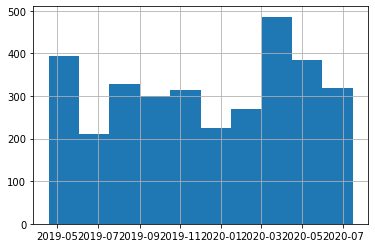

In [8]:
zb_tweets['created_at'].hist()

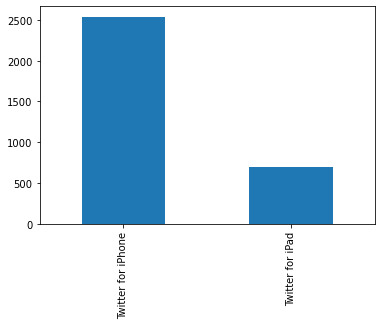

In [34]:
#z jakich urządzeń korzysta Zbigniew Boniek
zb_tweets['source'].value_counts().plot(kind='bar')

In [10]:
#funkcja, która zlicza ilość wyrazów w danym tweecie
def word_count(str):
    return len(str.split())

#funkcja, która zlicza ilość różnych wyrazów w danym tweecie
def dif_word_count(str):
    counts = dict()
    words = str.split()
    
    for word in words:
        if word in count:
            count[word] +=1
        else:
            count[word] = 1
    return counts

#funkcja zliczająca tweety
def tweet_counts(tweet_array, threshold = 10):
    unique, counts = np.unique(np.array(tweet_array), return_counts=True)
    count_dict = dict(zip(unique,counts))
    
    return [(k,v) for k,v in count_dict.items() if v > threshold]

In [11]:
#tweety pisane do konkretnych ludzi
who_zibi_replies_to = []
for tweet in zb_tweets['text']:
    if tweet[:1] == '@':
        #wzmianka
        tweet_splited = tweet.split()
        for i in range (0,len(tweet_splited)):
            if tweet_splited[i][0] == '@':
                who_zibi_replies_to.append(tweet_splited[i])
        

In [12]:
#sprawdźmy do kogo Boniek odpisywał częściej niż 5 razy
zibi_reply_counts = tweet_counts(who_zibi_replies_to, 5)
zibi_reply_counts

[('@AdamGodlewski', 9),
 ('@BL_1916', 40),
 ('@BorekMati', 47),
 ('@CeltDawid', 13),
 ('@CommonSensePL', 6),
 ('@DawidOlejnicza5', 6),
 ('@GrosickiKamil', 6),
 ('@GrzegKrychowiak', 6),
 ('@Iwanczyk_P', 7),
 ('@JOlkiewicz', 12),
 ('@JakubRzezniczak', 10),
 ('@JaroslawBinczyk', 9),
 ('@K_Stanowski', 125),
 ('@Kacpo24', 7),
 ('@KoltonRoman', 38),
 ('@LaczyNasPilka', 13),
 ('@LordKoks', 6),
 ('@LukaszOlkowicz', 12),
 ('@MKSCracoviaSSA', 8),
 ('@M_Wawrzynowski', 13),
 ('@Maciej_Sawicki', 9),
 ('@MiBiBialonski', 14),
 ('@MichalS1978', 7),
 ('@NiemiecRyszard', 6),
 ('@PiotrWolosik', 26),
 ('@Polsport', 24),
 ('@PrawdaFutbolu', 17),
 ('@RTS_Widzew_Lodz', 10),
 ('@RafalStec', 16),
 ('@RobertoRenga', 8),
 ('@SebastianMila11', 6),
 ('@SzJadczak', 21),
 ('@TSmokowski', 31),
 ('@TwaroTwaro', 7),
 ('@W_Kowal', 12),
 ('@WeszloCom', 12),
 ('@Wieslaw_Wilczyn', 6),
 ('@ZelekZyzynski', 10),
 ('@_Ekstraklasa_', 13),
 ('@cwiakala', 14),
 ('@czesmich', 17),
 ('@garnekmedia', 10),
 ('@grajmy_razem', 6),
 ('@

In [13]:
#wrzućmy to do DataFrame porządkując od największej do najmniejszej ilości wzmianek
zibi_replies_df = pd.DataFrame(zibi_reply_counts, columns=['who', 'count']).sort_values('count', ascending = False)
zibi_replies_df

,who,count
12,@K_Stanowski,125
2,@BorekMati,47
1,@BL_1916,40
14,@KoltonRoman,38
50,@mogiel90,32
32,@TSmokowski,31
24,@PiotrWolosik,26
45,@kowalski_cezary,25
25,@Polsport,24
49,@matiswiecicki,22


In [14]:
#oryginalne tweety (bez wzmianek innych użytkowników)
for tweet in zb_tweets['text']:
    if tweet[:1] != '@':
        print(tweet)

Che giocatore @EdDzeko 👌🏻👌🏻
Do @_1liga_  jeszcze daleko, ale dzisiaj po raz pierwszy w erze COVID 19 @RTS_Widzew_Lodz grał w piłkę 👏🏻👏🏻👏🏻
3-0 do przerwy, cicho sza🤞🤞🤞
RT @pzpn_pl: Od 21 listopada do 18 grudnia będzie trwał mundial w 2022 roku w Katarze.

Szczegółowy harmonogram ⤵
RT @AmpFutbolPolska: NIEZWYKLI PIŁKARZE ❤⚽

✅ PASJA 😍 
✅ RADOŚĆ 😃 
✅ MOTYWACJA 🔥

Zobaczcie jak grają najmłodsi piłkarze z niepełnosprawnoś…
Potwierdzam👍🏻 https://t.co/BUcYG76vBA
Szanowny Panie @PNisztor zgodnie z obietnicą odpowiadam:
Odp na pyt 4 - inne niż z moją żoną😜
Odp na pyt 5 - nie ma… https://t.co/7xAPRmGKeX
Gratuluje wygranej walki, oglądałem. Trzymam kciuki👊🏻👍🏻 https://t.co/UDugLCd6BY
RT @pzpn_pl: Znamy datę i godzinę meczu o Superpuchar Polski! 

📆 9 sierpnia 2020 | 20:00

Komunikat 👉 https://t.co/37TwAPtpSA https://t.co…
Pan Redaktor @PNisztor z Gazety Polskiej zwrócił się do PZPN  abyśmy odpowiedzieli (do 16.07) na 8 pytań. Na pytani… https://t.co/5588OtDB9n
Dzisiaj Pani Wiesia ma 64 urodziny❤️❤

Trzymam kciuki👍🏻👍🏻 i już nie mogę się doczekać, wykonaliście dobrą robotę🏍⚽️🏍⚽️ zawsze razem👍🏻 https://t.co/dZhihuA7qB
RT @LaczyNasPilka: 🔝🇵🇱
Sport to pasja, brawo Ania🇵🇱⚽️👍🏻👍🏻 https://t.co/yF4kDnXOxj
Widzę, ze nie zrozumieliście, ja się nie boje o siebie........😜😜😜😜😜👊🏻👊🏻👊🏻👊🏻
Boje się przyjść, jeszcze się pobijemy.... https://t.co/5sPHsuD2En
Brawo👍🏻👍🏻 https://t.co/IAmJmf8FLx
A maseczka gdzie, kolego? https://t.co/iYHhtKLWxg
Zasluguje na to panna Ewa, brawo⚽️🇵🇱👍🏻 https://t.co/2ayTBeYVuL
RT @laczynaskobieca: Ewa Pajor17 przedłużyła kontrakt z @VfLWob_Frauen do 2023 roku ‼️🏆 

- VfL to zespół z wielkimi ambicjami. Nie mogę si…
Ambasciata 🇮🇹 in 🇵🇱 https://t.co/PS3wO7JGw7
Karny.... https://t.co/Ou2YPFc3Vk
Jutro ważny dzień 👍🏻🇵🇱⚽️!
Nie szkoda czasu na głupoty, w masce to sędzia moze przyjechać na mecz.... https://t.co/36vhg7eFGE
Bravo Amigo👍🏻👍🏻 https://t.co/BM8epIosGk
Autopromocja? https://t.co/bniVOR7fuI
ESA to specyficzna spółka. 16 klubów posiada równo po 5,8% akcji. Przedstawiciele wszys

Niespodzianka na biurku , czyli smacznego👍🏻 #WkręćRogala https://t.co/EYVJEMBmDG
Tak patrzę na Lautaro Martineza i widzę, ze mamy u nas jednego młodego, który za 1/2 lata może być do niego bardzo podobny.
RT @RTS_Widzew_Lodz: W takim składzie Widzew wyjdzie na drugie spotkanie z Juve!

Już za godzinę w Turynie zacznie się rewanż w ramach 1/16…
RT @PZPNPuchar: 🔴 Znamy pary 1/8 finału Totolotek Pucharu Polski! 

Będzie się działo! 

#PucharTysiacaDruzyn https://t.co/Nn3PAvJObv
RT @PZPNPuchar: 🔴 Losowanie 1/8 finału Totolotek Pucharu Polski odbędzie się 5 listopada o 12:00!

NA ŻYWO na Youtube Łączy Nas Piłka! 🎥 ht…
RT @LaczyNasPilka: Będziemy mieli debiutanta na zgrupowaniu reprezentacji Polski. 💪🇵🇱
Powołanie otrzymał zawodnik @LechPoznan - Kamil Jóźwi…
Najlepszego Artur🍾👍🏻 https://t.co/j2KsJZWwgm
Brawo👏🏻👏🏻 https://t.co/2ovJnWCZJi
Panie Prezesie dziękuje za dobry news, 🇵🇱⚽️ odetchnęła. P&amp;P nie będą kandydować na stanowisko Prezesa PZPN🍾👍🏻
RT @LaczyNasPilka: 🇵🇱 POŻEGNANIE PISZCZKA 🇵🇱


In [15]:
#tylko retweety
who_zibi_retweets = []
for tweet in zb_tweets['text']:
    if tweet[:2] == 'RT':
        #retweet
        splited = tweet.split(': ')
        rt, who = splited[0].split(' ')
        who_zibi_retweets.append(who)  

In [16]:
#sprawdźmy kogo Boniek retweetował najczęściej
zibi_retweet_counts = tweet_counts(who_zibi_retweets, 5)
zibi_retweet_counts

[('@AmpFutbolPolska', 9),
 ('@FIFAcom', 6),
 ('@LaczyNasPilka', 197),
 ('@Maciej_Sawicki', 8),
 ('@MiBiBialonski', 7),
 ('@PZPNGrassroots', 23),
 ('@PZPNPuchar', 10),
 ('@RTS_Widzew_Lodz', 6),
 ('@a_delimat', 6),
 ('@adriandudacom', 8),
 ('@laczynaskobieca', 50),
 ('@mzachodny', 7),
 ('@pzpn_pl', 47),
 ('@sport_tvppl', 9)]

In [17]:
#wrzućmy to do DataFrame porządkując od największej do najmniejszej ilości retweetów
zibi_retweet_df = pd.DataFrame(zibi_retweet_counts, columns=['who', 'count']).sort_values('count', ascending = False)
zibi_retweet_df

,who,count
2,@LaczyNasPilka,197
10,@laczynaskobieca,50
12,@pzpn_pl,47
5,@PZPNGrassroots,23
6,@PZPNPuchar,10
0,@AmpFutbolPolska,9
13,@sport_tvppl,9
3,@Maciej_Sawicki,8
9,@adriandudacom,8
4,@MiBiBialonski,7


In [38]:
zb_tweets.sample(10)

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count,year,month,day,day_of_the_week,hour
1466,1217382721481252864,2020-01-15 09:47:13,@LukaszOlkowicz Jakiś przykład?,Twitter for iPhone,2302054460.00,0,7,2020,1,15,2,9
47,1281236469751984134,2020-07-09 14:39:13,RT @laczynaskobieca: .@e_zduneky przedłużyła kontrakt z @SevillaFC_Fem! 🇪🇸\r\n\r\nWIĘCEJ👉 https://t.co/OiUmB0QcHd https://t.co/e5hfxrNIMC,Twitter for iPhone,nan,8,0,2020,7,9,3,14
2125,1179499485589835777,2019-10-02 20:52:46,Jak masz Messiego.......👏🏻👏🏻,Twitter for iPad,nan,2,261,2019,10,2,2,20
2816,1135858912308187136,2019-06-04 10:40:42,"Brawo Trener, mądrze i na temat👍🏻 https://t.co/9e01fSTpBt",Twitter for iPhone,nan,8,78,2019,6,4,1,10
1780,1195292968934158336,2019-11-15 10:50:25,Czytam wiele wywiadów z ludźmi Wisły Kraków. Fajnie to wszystko wyglada w mediach. Rzeczywistość jest trochę inna-… https://t.co/VO0uigo6ww,Twitter for iPhone,nan,6,241,2019,11,15,4,10
1989,1185108594557100032,2019-10-18 08:21:21,Zgodnie z ustaleniami Lukasz. Czekam na Ciebie na PGE NARODOWYM 🇵🇱⚽️🇵🇱 https://t.co/M891Go8BFv,Twitter for iPhone,nan,10,358,2019,10,18,4,8
16,1282591724880232449,2020-07-13 08:24:31,I tego się trzymajmy.... droga jeszcze daleka👍🏻 https://t.co/VsFlsuHTKd,Twitter for iPhone,nan,1,122,2020,7,13,0,8
179,1273949221184561152,2020-06-19 12:02:17,Ostatni padel z kolegami ( poznajecie kogoś) i wracamy 1850 km😢😢👍🏻👍🏻 https://t.co/w9NVGWNlfw,Twitter for iPhone,nan,10,869,2020,6,19,4,12
387,1264447771660161024,2020-05-24 06:46:55,"RT @LaczyNasPilka: Był taki dzień, w którym Tomasz Hajto strzelił dwa gole w meczu z Rosją. 😎🇵🇱\r\n\r\n🗓️ 27 maja 1998 roku\r\n🏟️ @StadionSlaski \r\nWs…",Twitter for iPad,nan,10,0,2020,5,24,6,6
1657,1202141564547584001,2019-12-04 08:24:18,"@arkowcypl ... jestem przekonany, ze to tylko przypadek, tak samo jak kiedyś przypadkowo strzelono ważną bramkę ręk… https://t.co/FdWhZFWwql",Twitter for iPhone,405596702.00,1,52,2019,12,4,2,8


In [19]:
zb_tweets['year'] = pd.DatetimeIndex(zb_tweets['created_at']).year
zb_tweets['month'] = pd.DatetimeIndex(zb_tweets['created_at']).month
zb_tweets['day'] = pd.DatetimeIndex(zb_tweets['created_at']).day
zb_tweets['day_of_the_week'] = pd.DatetimeIndex(zb_tweets['created_at']).dayofweek
zb_tweets['hour'] = pd.DatetimeIndex(zb_tweets['created_at']).hour

In [42]:
weekday_map = {0: 'Poniedziałek', 1: 'Wtorek', 2: 'Środa', 3: 'Czwartek', 4: 'Piątek', 5: 'Sobota', 6: 'Niedziela'}

zb_tweets['weekday_text']=zb_tweets['day_of_the_week'].map(weekday_map)
zb_tweets.sample(5)

,id_str,created_at,text,source,in_reply_to_user_id_str,retweet_count,favorite_count,year,month,day,day_of_the_week,hour,weekday_text
472,1259925955465936897,2020-05-11 19:18:50,Dzięki👍🏻 https://t.co/WRUyFlDbxL,Twitter for iPhone,nan,1,72,2020,5,11,0,19,Poniedziałek
2741,1137984310802300928,2019-06-10 07:26:17,RT @sport_tvppl: Co za bomby 💣 Kazimierza Deyny i @BoniekZibi 😍 Dokładnie 4⃣1⃣ lat temu pokonaliśmy Meksyk 3:1 na mistrzostwach świata w Ar…,Twitter for iPhone,nan,18,0,2019,6,10,0,7,Poniedziałek
1873,1190680169494851584,2019-11-02 17:20:48,"RT @LaczyNasPilka: .@czesmich: ""Jest bardzo inteligentny, szybko myśli na boisku, przypomina mi pod tym względem Tomasza Frankowskiego"".\r\nO…",Twitter for iPhone,nan,5,0,2019,11,2,5,17,Sobota
575,1255182269146415105,2020-04-28 17:09:07,"Świerszcz się pcha pod pociąg towarowy, czy On oszalał? 👊🏻👊🏻😜 https://t.co/CvVxCw0OOD",Twitter for iPhone,nan,14,541,2020,4,28,1,17,Wtorek
253,1269956545699368966,2020-06-08 11:36:49,"Ale ktoś Frankowi na to pozwolił. Piłka nie jest taka prosta, a mówienie ze Smuda be, be jest śmieszne. A gdzie byl… https://t.co/vDC4uy5nua",Twitter for iPhone,nan,1,77,2020,6,8,0,11,Poniedziałek


In [21]:
zb_tweet_freq_year = zb_tweets.groupby('year').count().reset_index()[['year','id_str']]
zb_tweet_freq_year.rename(columns={"id_str": "count"}, inplace=True)
zb_tweet_freq_year

,year,count
0,2019,1715
1,2020,1514


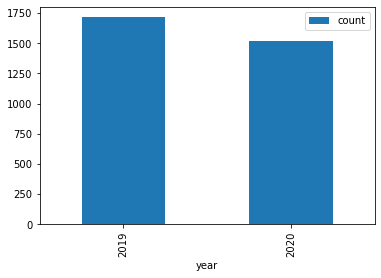

In [24]:
zb_tweet_freq_year.plot('year', 'count', kind='bar')

In [25]:
zb_tweet_freq_month = zb_tweets.groupby(['year','month']).count().reset_index()[['month','id_str']]
zb_tweet_freq_month

,month,id_str
0,4,103
1,5,281
2,6,211
3,7,106
4,8,230
5,9,160
6,10,246
7,11,207
8,12,171
9,1,143


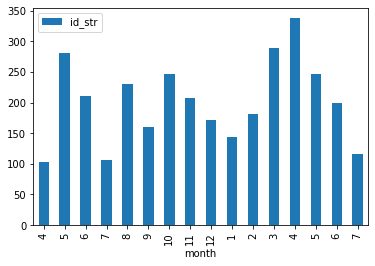

In [26]:
zb_tweet_freq_month.plot('month', 'id_str', kind='bar')

In [30]:
zb_tweet_freq_day = zb_tweets.groupby(['year','day']).count().reset_index()[['day','id_str']]
zb_tweet_freq_day.rename(columns={"id_str": "count"}, inplace=True)
zb_tweet_freq_day

,day,count
0,1,58
1,2,76
2,3,55
3,4,65
4,5,46
5,6,37
6,7,62
7,8,89
8,9,54
9,10,50


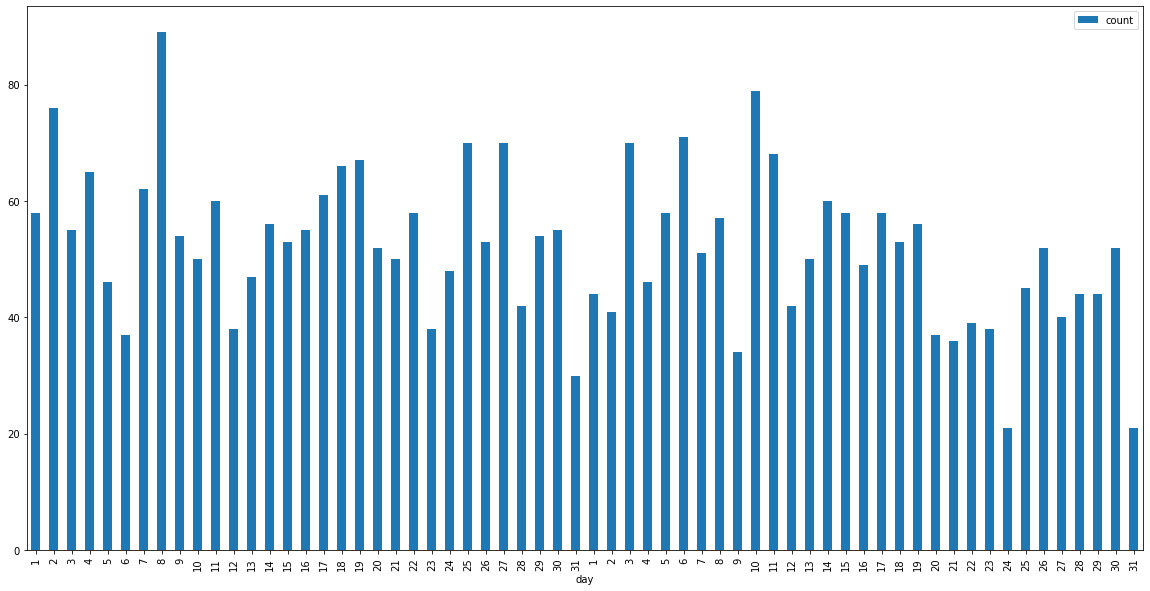

In [36]:
zb_tweet_freq_day.plot('day', 'count', kind='bar', figsize=(20,10))